Saving Airfares_simple_garbled2.csv to Airfares_simple_garbled2 (4).csv


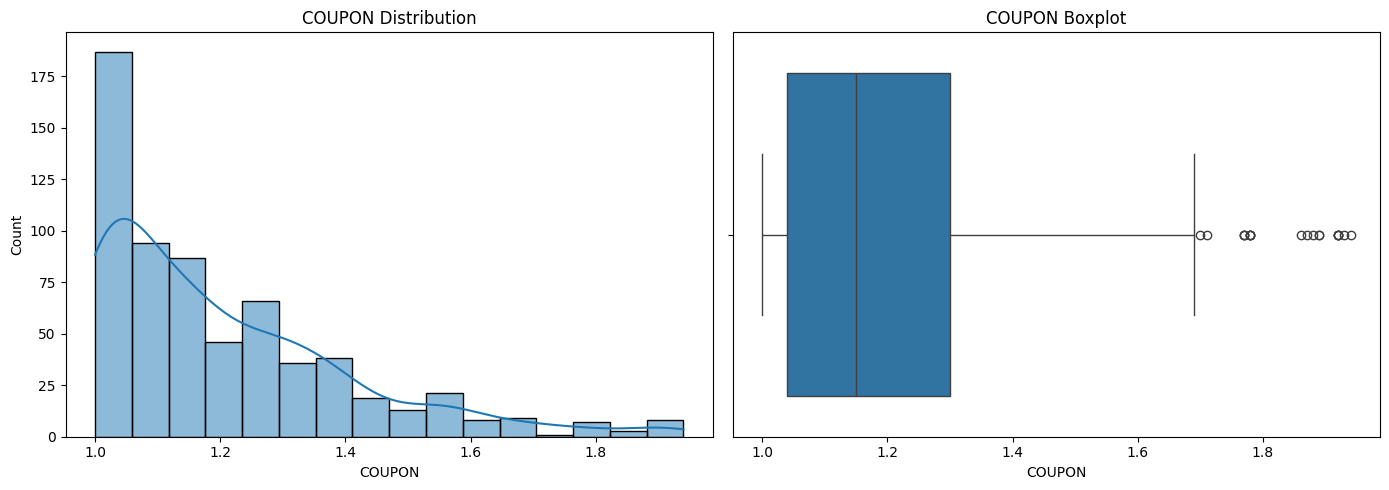

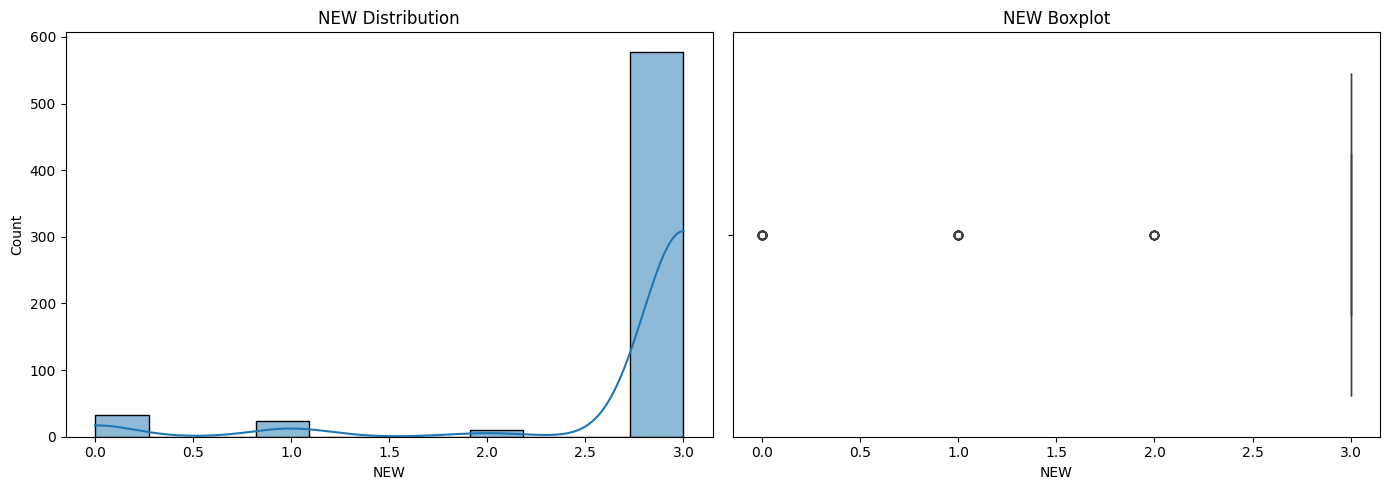

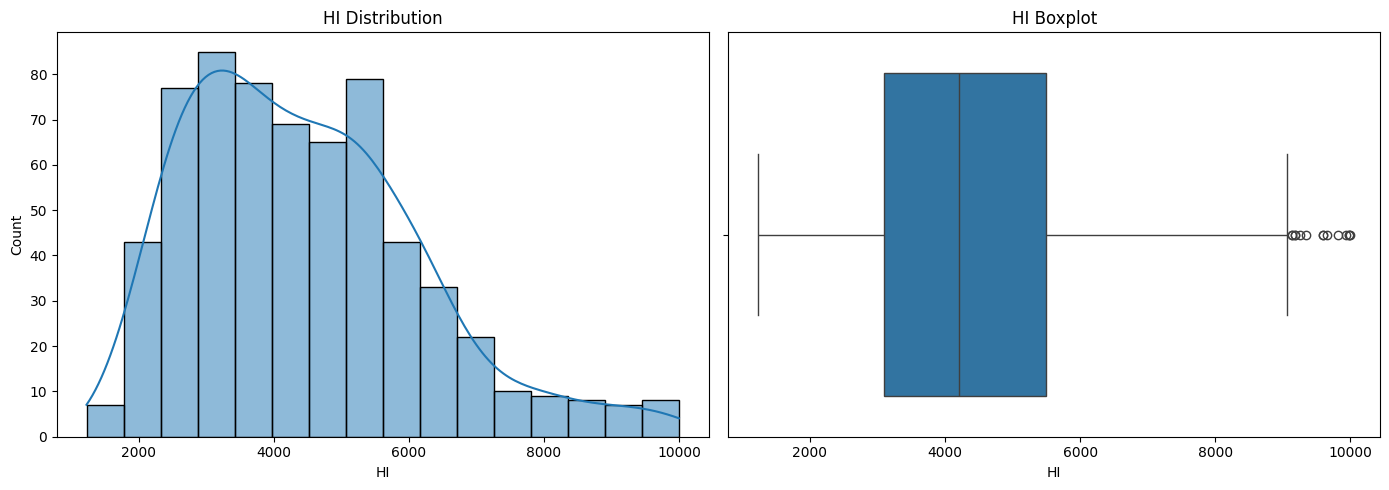

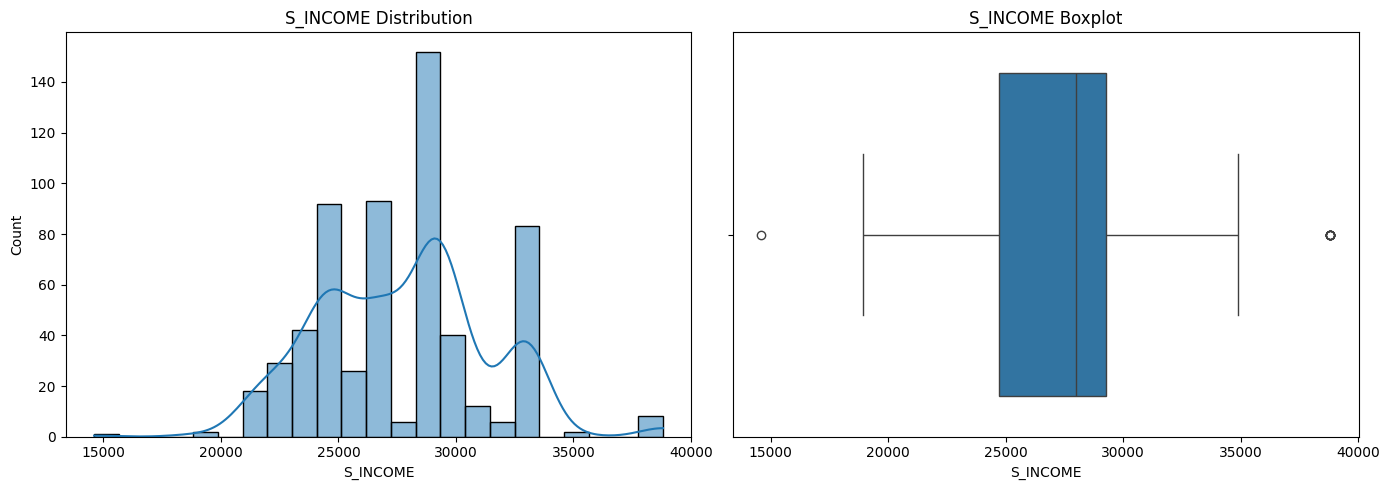

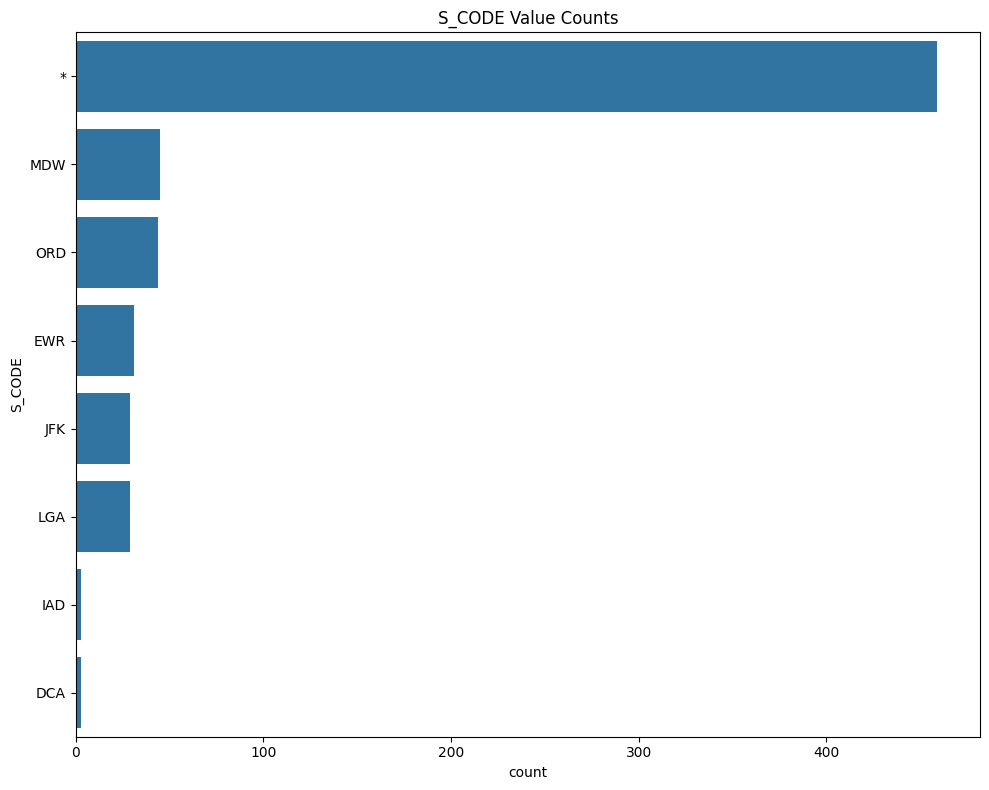

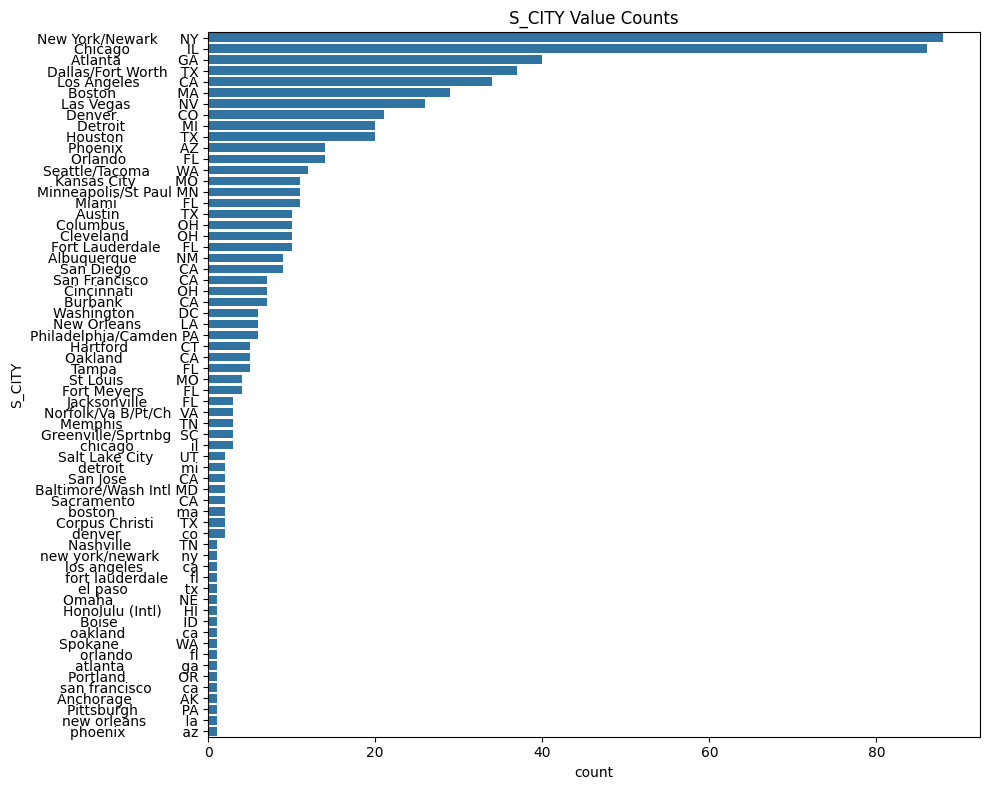

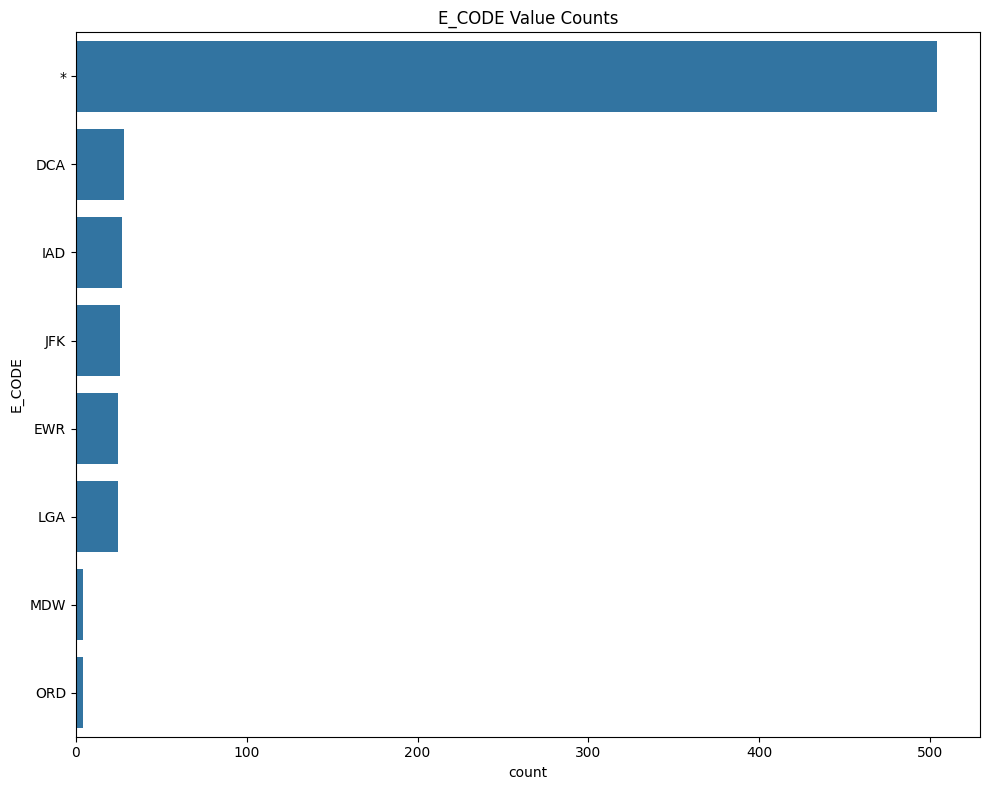

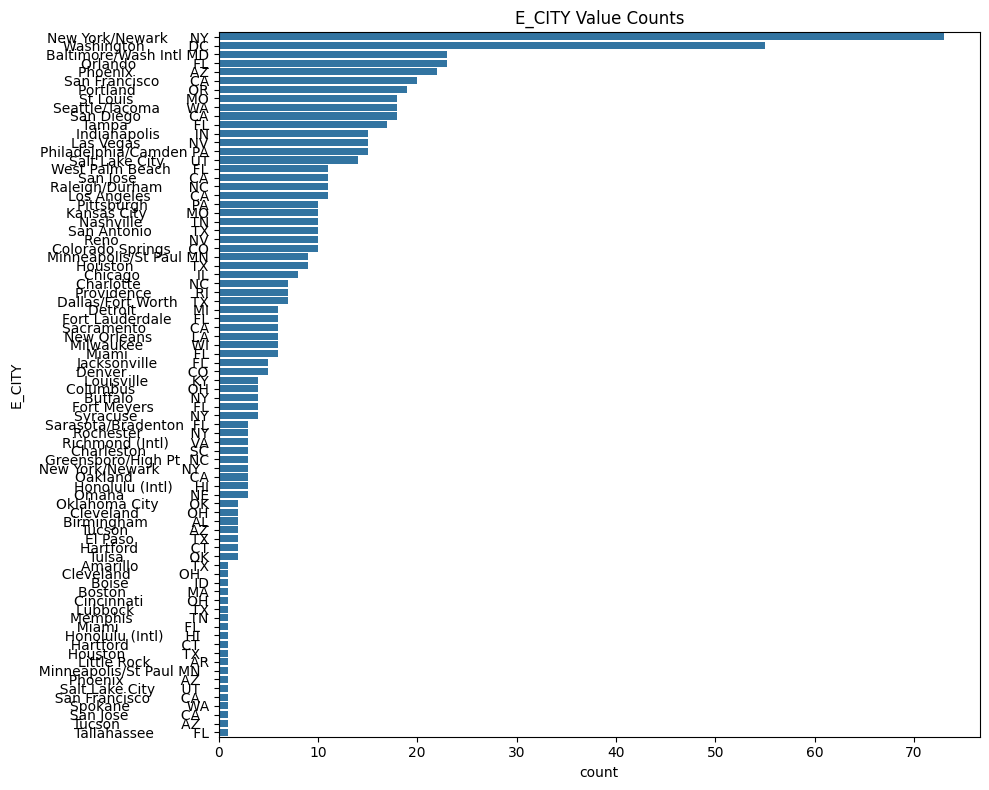

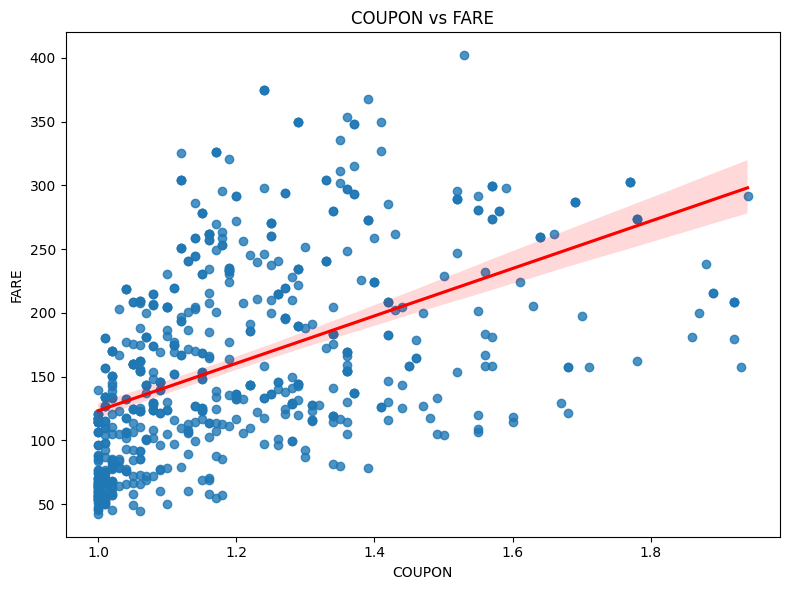

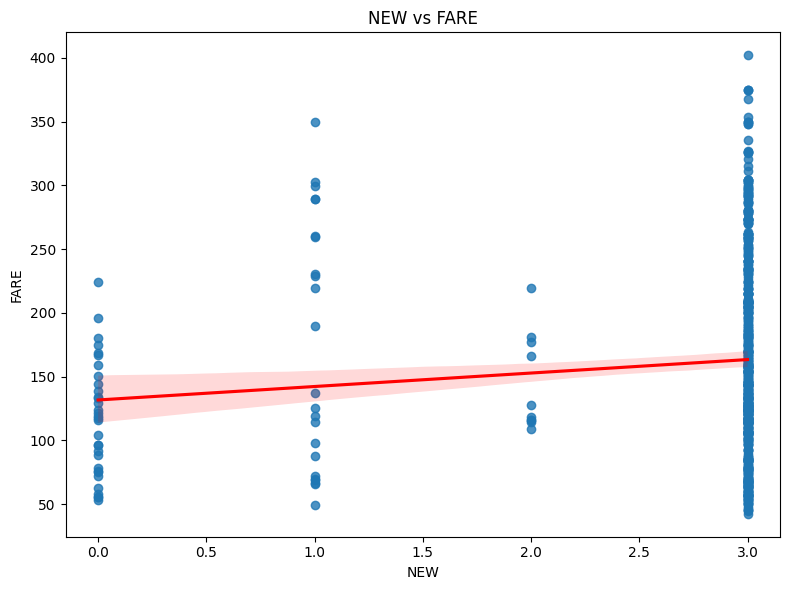

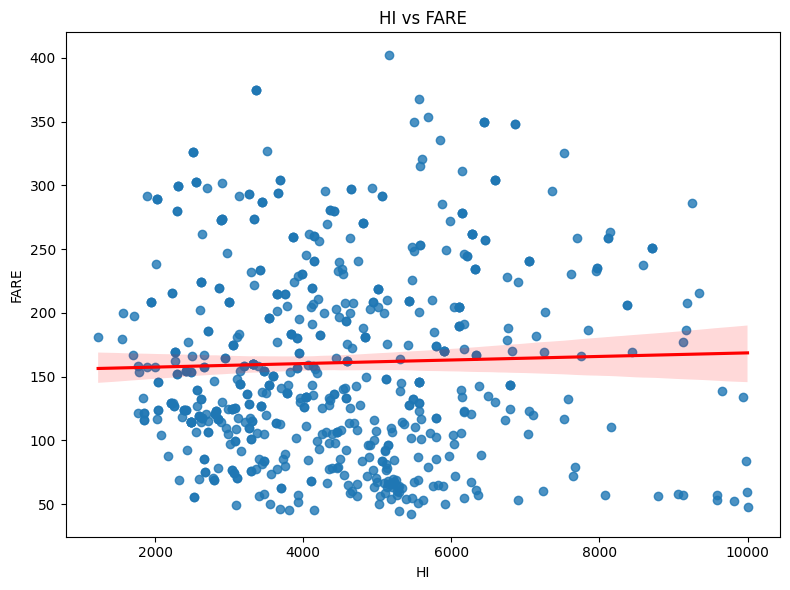

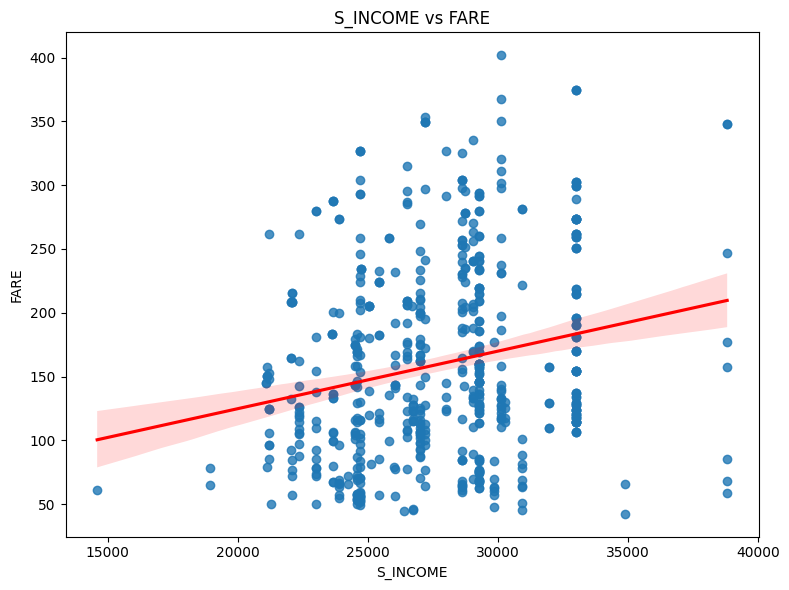

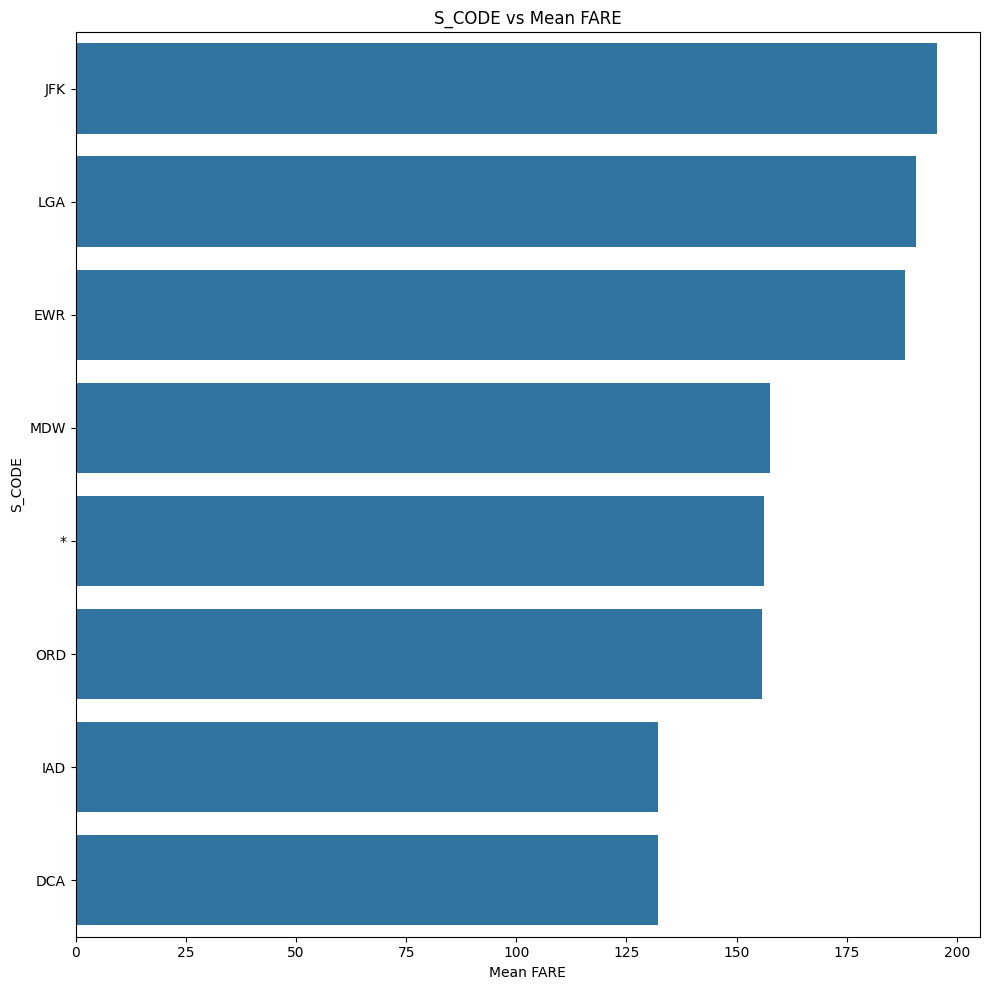

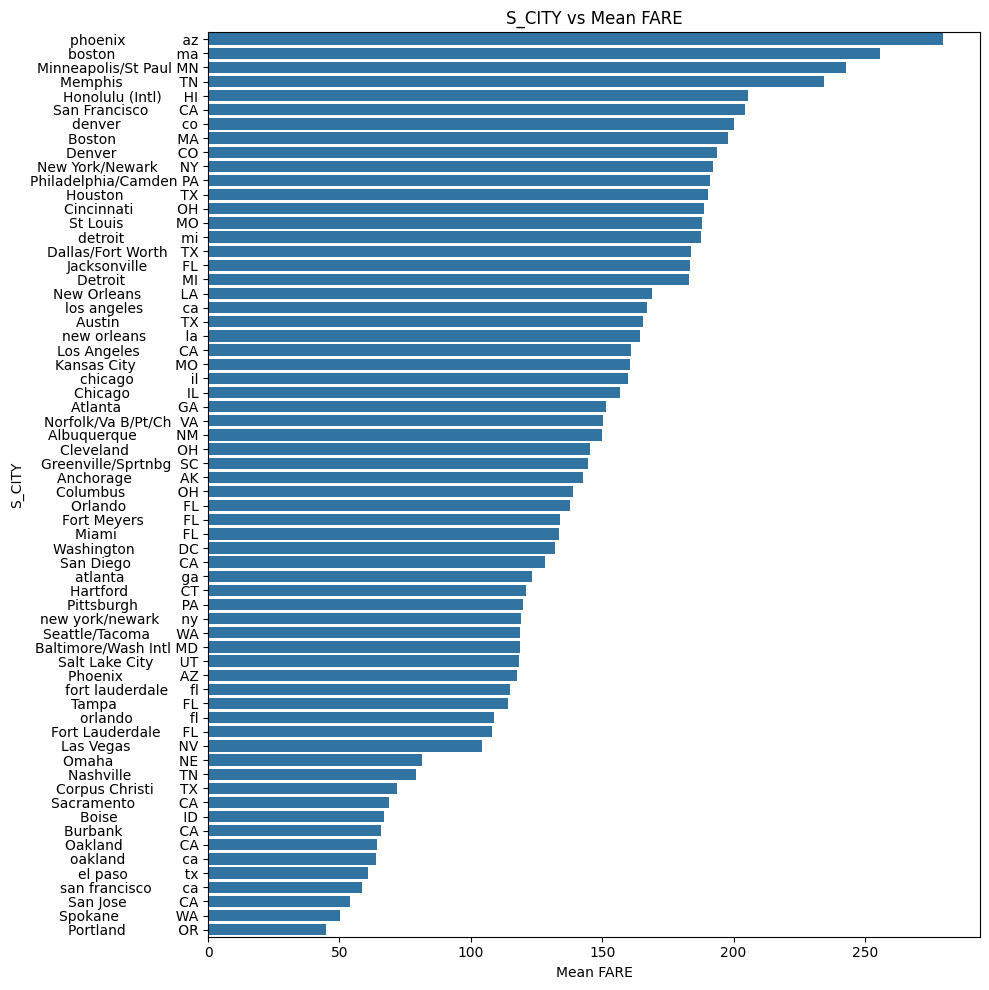

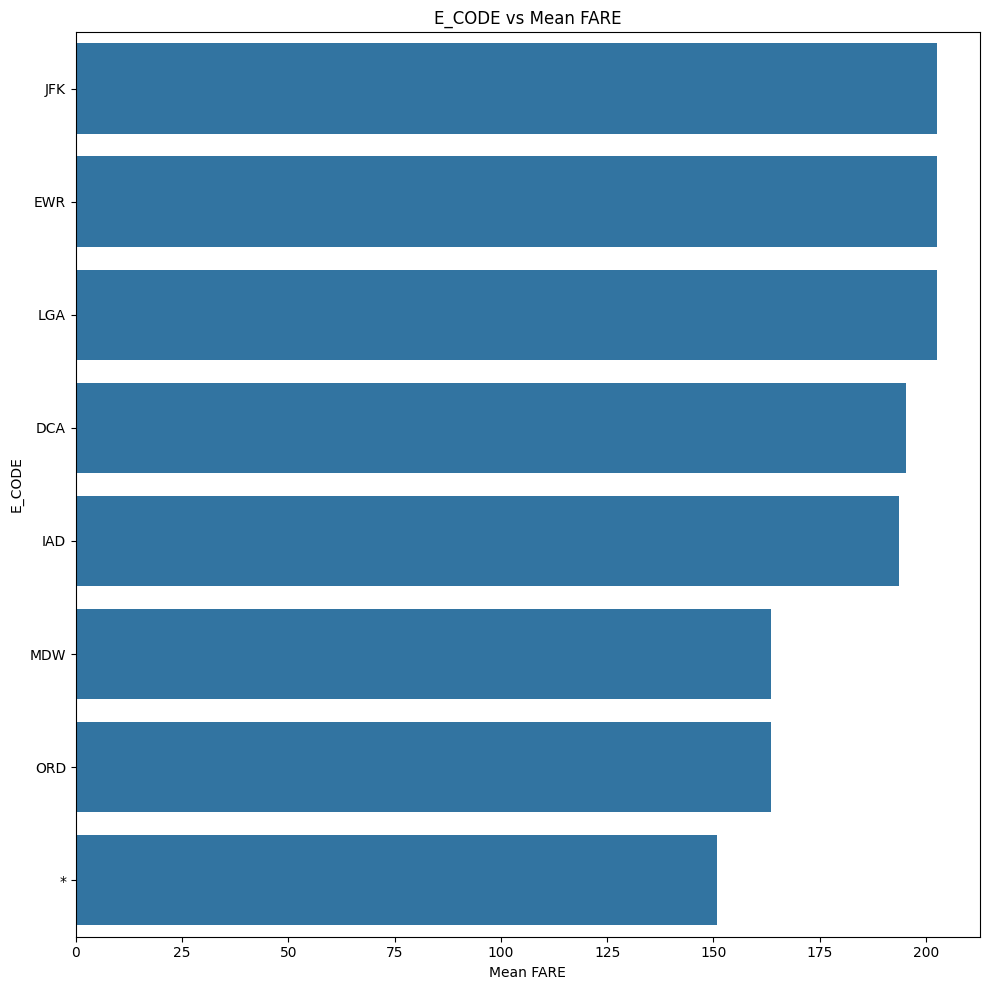

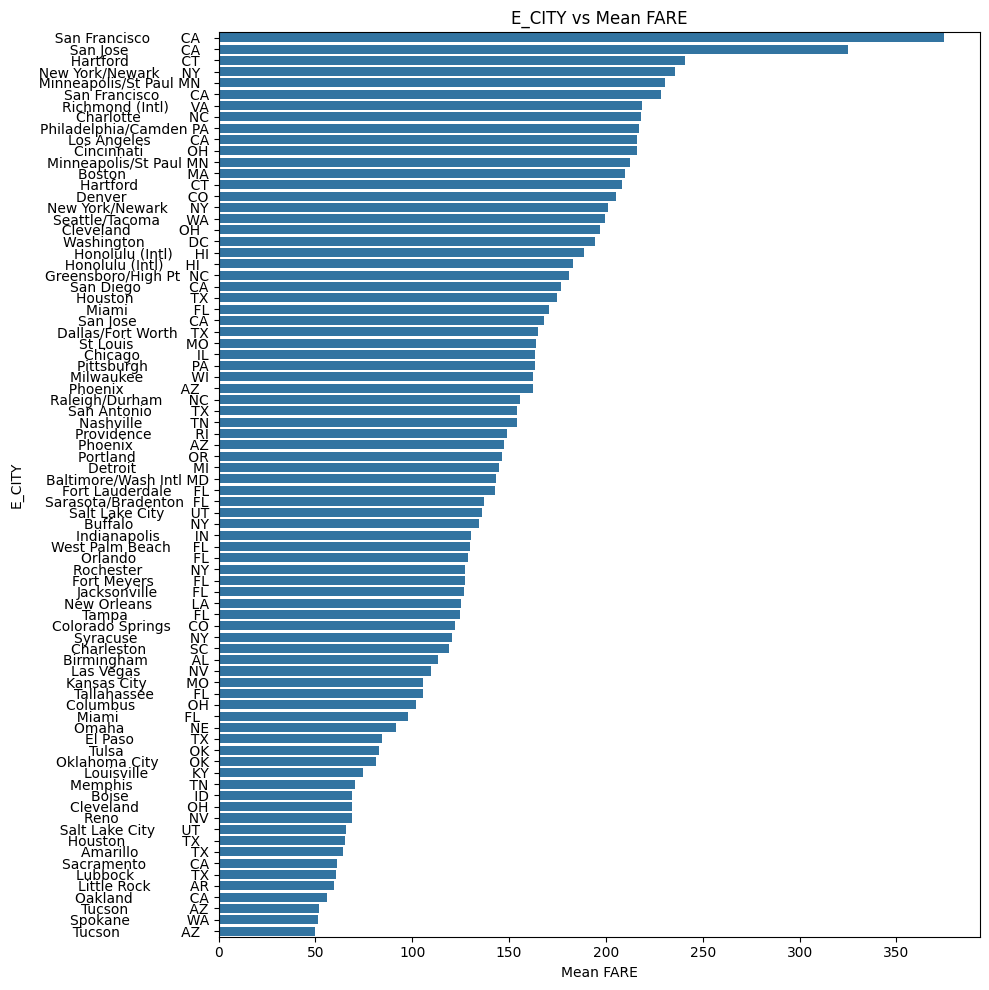

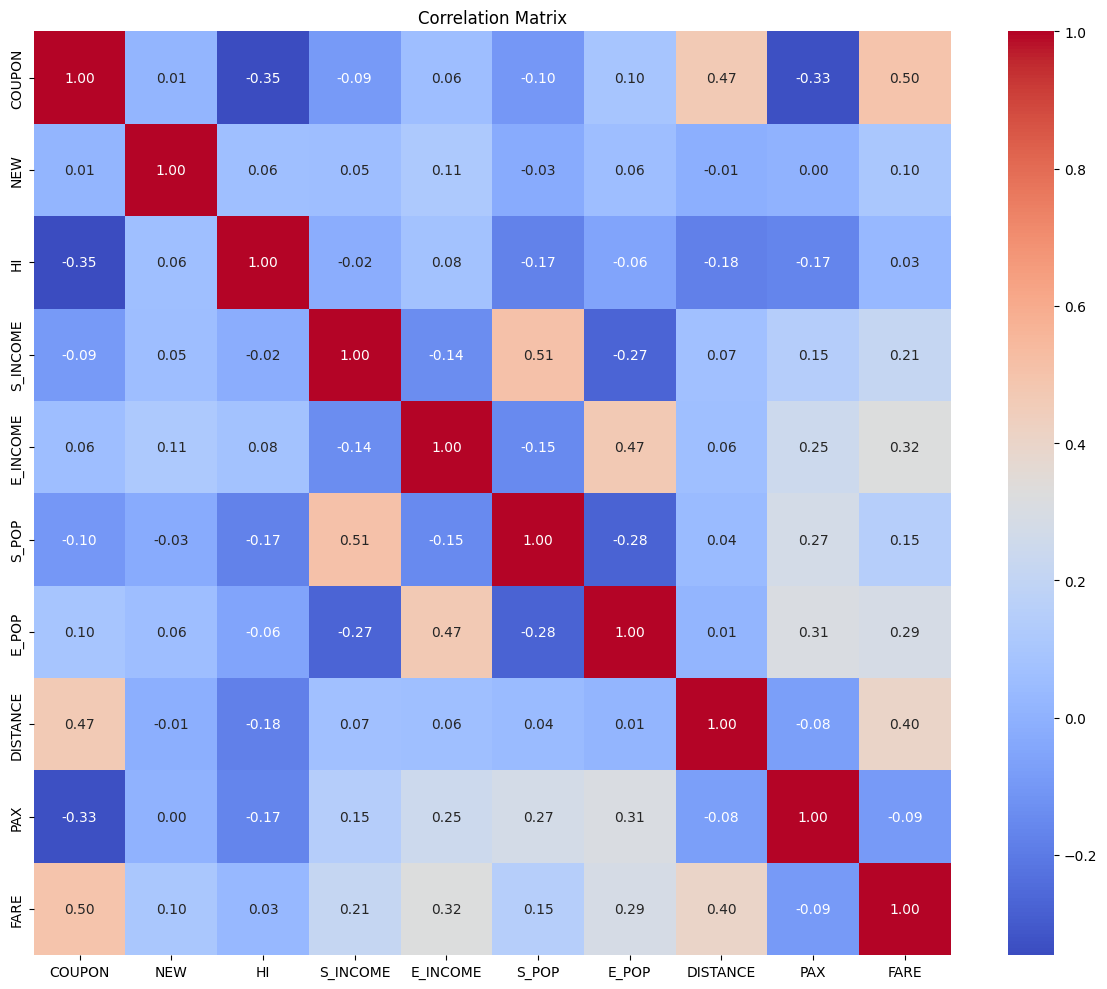

In [8]:
# Phase 2.1~2.2

# 1. ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 2. ColabÏóêÏÑú ÌååÏùº ÏóÖÎ°úÎìú
from google.colab import files
uploaded = files.upload()

# 3. ÏóÖÎ°úÎìúÎêú ÌååÏùºÏùÑ PandasÎ°ú Î°úÎìú
import io
filename = list(uploaded.keys())[0]
df2 = pd.read_csv(io.BytesIO(uploaded[filename]))

# 4. Î≥ÄÏàò Î∂ÑÎ¶¨ Î∞è Ï¥àÍ∏∞ ÏÑ§Ï†ï
TARGET_COLUMN = 'FARE'
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df2.select_dtypes(include='object').columns.tolist()
numeric_cols.remove(TARGET_COLUMN)
df2 = df2[df2['FARE'] >= 0]

# ÎåÄÌëú ÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (Ï≤òÏùå 4Í∞ú)
import matplotlib.pyplot as plt
import seaborn as sns

sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df2[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')
    sns.boxplot(x=df2[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()

# ÎåÄÌëú Î≤îÏ£ºÌòï Î≥ÄÏàò ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôî (Ï≤òÏùå 4Í∞ú, Í∞ÄÎ°ú Í∑∏ÎûòÌîÑ)
sample_categorical = categorical_cols[:4]
for col in sample_categorical:
    plt.figure(figsize=(10, 8))
    order = df2[col].value_counts().index
    sns.countplot(data=df2, y=col, order=order)
    plt.title(f'{col} Value Counts')
    plt.tight_layout()
    plt.show()

# ÏàòÏπòÌòï Î≥ÄÏàò vs ÌÉÄÍ≤ü ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†
for col in sample_numeric:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df2[col], y=df2[TARGET_COLUMN], line_kws={"color": "red"})
    plt.title(f'{col} vs {TARGET_COLUMN}')
    plt.tight_layout()
    plt.show()

# Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ ÌÉÄÍ≤ü ÌèâÍ∑† (Í∞ÄÎ°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
for col in sample_categorical:
    plt.figure(figsize=(10, 10))
    category_means = df2.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
    sns.barplot(y=category_means.index, x=category_means.values)
    plt.title(f'{col} vs Mean {TARGET_COLUMN}')
    plt.xlabel(f'Mean {TARGET_COLUMN}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
corr_matrix = df2[numeric_cols + [TARGET_COLUMN]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [7]:
# Phase 2.3

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÎûµ
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò (IQR Î∞©Ïãù)
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[column].clip(lower=lower, upper=upper)

# Ïù∏ÏΩîÎî© Î∞è Ïä§ÏºÄÏùºÎßÅ Ï†ÑÎûµ
encoder = OneHotEncoder(drop='first', sparse_output=False)
scaler = StandardScaler()

# Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ ÏöîÏïΩ
preprocessing_plan_df2 = {
    "ÏàòÏπòÌòï Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨": str(numeric_imputer),
    "Î≤îÏ£ºÌòï Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨": str(categorical_imputer),
    "Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ìï®Ïàò": "clip_outliers_iqr(df, column)",
    "Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©": str(encoder),
    "ÏàòÏπòÌòï Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ": str(scaler)
}

preprocessing_plan_df2


{'ÏàòÏπòÌòï Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨': "SimpleImputer(strategy='median')",
 'Î≤îÏ£ºÌòï Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨': "SimpleImputer(strategy='most_frequent')",
 'Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ìï®Ïàò': 'clip_outliers_iqr(df, column)',
 'Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©': "OneHotEncoder(drop='first', sparse_output=False)",
 'ÏàòÏπòÌòï Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ': 'StandardScaler()'}

Í≤∞Î°†(Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Í∞ÄÏÑ§ ÏàòÎ¶Ω Î∞è Í≤ÄÏ¶ù)

üéØ 1. Í≤ΩÏú† ÏàòÏôÄ Ïö¥ÏûÑ Í∞Ñ Í¥ÄÍ≥Ñ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
COUPONÏù¥ ÎßéÏùÑÏàòÎ°ù FAREÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)

ÌöåÍ∑ÄÏÑ†Ïù¥ ÏôÑÎßåÌïòÍ≤å Ïö∞ÏÉÅÌñ•

üìå Í∞ÄÏÑ§ ‚ë†
‚ÄúÍ≤ΩÏú† ÌöüÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Ìï≠Í≥µ Ïö¥ÏûÑÏù¥ ÎÜíÏïÑÏßÑÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
ÏÉÅÍ¥ÄÍ≥ÑÏàò(R), p-value

üéØ 2. ÎÖ∏ÏÑ† Ïã†Í∑úÏÑ±(NEW)Í≥º Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
NEWÍ∞Ä 3Ïù∏ Ïã†Í∑úÎÖ∏ÏÑ†ÏùºÏàòÎ°ù ÌèâÍ∑† ÏöîÍ∏àÏù¥ ÎÇÆÏùå

ÏùºÎ∂Ä ÎèÑÏãúÏóêÏÑúÎßå Î™ÖÌôïÌïú Ìå®ÌÑ¥

üìå Í∞ÄÏÑ§ ‚ë°
‚ÄúÏã†Í∑ú ÎÖ∏ÏÑ†ÏùÄ ÌîÑÎ°úÎ™®ÏÖò Í∞ÄÍ≤© ÎïåÎ¨∏Ïóê Í∏∞Ï°¥ ÎÖ∏ÏÑ†Î≥¥Îã§ ÌèâÍ∑† Ïö¥ÏûÑÏù¥ ÎÇÆÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
NEW Í∞íÏóê Îî∞Î•∏ Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† FARE ÎπÑÍµê (ANOVA ÎòêÎäî t-test)

üéØ 3. Ìò∏ÌÖîÏßÄÏàò(HI)ÏôÄ Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
HIÍ∞Ä ÎÜíÏùÑÏàòÎ°ù FAREÎèÑ ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•

Í¥ÄÍ¥ëÏßÄÏùºÏàòÎ°ù ÏöîÍ∏àÏù¥ ÏÉÅÏäπ

üìå Í∞ÄÏÑ§ ‚ë¢
‚ÄúÍ¥ÄÍ¥ë ÏàòÏöîÍ∞Ä ÎÜíÏùÄ ÏßÄÏó≠ÏùºÏàòÎ°ù Ìï≠Í≥µ Ïö¥ÏûÑÏù¥ ÎÜíÍ≤å Ï±ÖÏ†ïÎêúÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
HI ÏÉÅÏúÑ 25% vs ÌïòÏúÑ 25% Í∑∏Î£πÏùò FARE ÎπÑÍµê

ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú HI Í≥ÑÏàò ÌôïÏù∏

üéØ 4. Ï∂úÎ∞úÏßÄ ÏÜåÎìù(S_INCOME)Í≥º Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
S_INCOMEÏù¥ ÎÜíÏùÑÏàòÎ°ù FAREÍ∞Ä Îã§ÏÜå ÎÜíÏùå

ÎöúÎ†∑Ìïú ÏÑ†Ìòï Í¥ÄÍ≥ÑÎäî ÏïÑÎãàÏßÄÎßå ÏôÑÎßåÌïú Í≤ΩÌñ• ÏûàÏùå

üìå Í∞ÄÏÑ§ ‚ë£
‚ÄúÏÜåÎìù ÏàòÏ§ÄÏù¥ ÎÜíÏùÄ ÎèÑÏãúÏóêÏÑú Ï∂úÎ∞úÌïòÎäî Ìï≠Í≥µÌé∏ÏùÄ ÏöîÍ∏àÏù¥ Îçî ÎÜíÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
S_INCOMEÏùÑ ÏÜåÎìù Íµ¨Í∞ÑÎ≥Ñ(ÏÉÅ/Ï§ë/Ìïò)Î°ú ÎÇòÎàà ÌõÑ FARE ÌèâÍ∑† ÎπÑÍµê

Îã§Ï§ë ÌöåÍ∑Ä Ïãú ÌÜµÏ†ú Î≥ÄÏàòÎ°ú Í≥†Î†§

üéØ 5. Í±∞Î¶¨(DISTANCE)ÏôÄ Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

Í±∞Ïùò ÏßÅÏÑ†Ïóê Í∞ÄÍπåÏö¥ ÌöåÍ∑ÄÏÑ†

üìå Í∞ÄÏÑ§ ‚ë§
‚ÄúÌï≠Í≥µ Ïö¥ÏûÑÏùÄ ÎπÑÌñâ Í±∞Î¶¨ÏôÄ Ï†ïÎπÑÎ°Ä Í¥ÄÍ≥ÑÏù¥Îã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Î°ú Í±∞Î¶¨ ÌïòÎÇòÎßå ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°Î†• ÌôïÏù∏ (R¬≤)

üéØ 6. Ï∂úÎ∞úÏßÄ/ÎèÑÏ∞©ÏßÄ ÎèÑÏãúÎ≥Ñ ÌèâÍ∑† ÏöîÍ∏à Ï∞®Ïù¥
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
ÎèÑÏãúÎ≥Ñ FAREÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Î©∞ ÌäπÏ†ï ÎèÑÏãúÍµ∞Ïù¥ ÌèâÍ∑† Ïö¥ÏûÑÏùÑ Ï£ºÎèÑ

"New York" Í¥ÄÎ†® ÎèÑÏãúÎì§Ïù¥ ÌèâÍ∑† ÏöîÍ∏à ÏÉÅÏúÑÏóê ÏúÑÏπò

üìå Í∞ÄÏÑ§ ‚ë•
‚ÄúÌóàÎ∏å Í≥µÌï≠Ïù¥ ÏûàÎäî ÎèÑÏãúÏùºÏàòÎ°ù Ìï≠Í≥µ ÏöîÍ∏àÏù¥ ÎÜíÍ≤å ÎÇòÌÉÄÎÇúÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
Ï£ºÏöî ÎèÑÏãú(Hub vs Non-Hub) Í∏∞Ï§Ä Ïù¥Î∂ÑÌôî ÌõÑ ÌèâÍ∑† ÏöîÍ∏à ÎπÑÍµê (t-test)

S_CITY, E_CITYÎ•º ÎçîÎØ∏ Î≥ÄÏàòÎ°ú ÌöåÍ∑Ä Î∂ÑÏÑù

üéØ 7. Ïä¨Î°Ø/Í≤åÏù¥Ìä∏ Ï†úÏïΩÍ≥º ÏöîÍ∏à
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
SLOT=Controlled, GATE=ConstrainedÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† ÏöîÍ∏àÏù¥ ÎÜíÏùå

üìå Í∞ÄÏÑ§ ‚ë¶
‚ÄúÍ≥µÌï≠ ÏûêÏõêÏù¥ Ï†úÌïúÎêú Í≤ΩÏö∞ Ìï≠Í≥µ Ïö¥ÏûÑÏù¥ ÏÉÅÏäπÌïúÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
SLOT, GATEÏóê Îî∞Î•∏ Í∑∏Î£π ÌèâÍ∑† ÎπÑÍµê (t-test)

ÎçîÎØ∏ Î≥ÄÏàò Ïù∏ÏΩîÎî© ÌõÑ ÌöåÍ∑ÄÍ≥ÑÏàò ÌôïÏù∏

üîç Ï¢ÖÌï©: Í∞ÄÏÑ§ Í∏∞Î∞ò EDA ÌîÑÎ†àÏûÑÏõåÌÅ¨ Ï†ïÎ¶¨
Í∞ÄÏÑ§ Î≤àÌò∏	ÏöîÏïΩ	Î∂ÑÏÑù Î∞©Ïãù
‚ë†	Í≤ΩÏú†Ïàò‚Üë ‚Üí ÏöîÍ∏à‚Üë	ÏÉÅÍ¥Ä/ÌöåÍ∑Ä
‚ë°	Ïã†Í∑úÎÖ∏ÏÑ† ‚Üí ÏöîÍ∏à‚Üì	Í∑∏Î£π ÎπÑÍµê
‚ë¢	Í¥ÄÍ¥ëÏßÄ ‚Üí ÏöîÍ∏à‚Üë	Í∑∏Î£π/ÌöåÍ∑Ä
‚ë£	ÏÜåÎìù‚Üë ‚Üí ÏöîÍ∏à‚Üë	ÌöåÍ∑Ä
‚ë§	Í±∞Î¶¨‚Üë ‚Üí ÏöîÍ∏à‚Üë	ÏÑ†Ìòï ÌöåÍ∑Ä
‚ë•	ÎèÑÏãúÎ≥Ñ ÏöîÍ∏à Ï∞®Ïù¥	ÎèÑÏãúÍµ∞ ÎπÑÍµê
‚ë¶	Ï†úÏïΩ ÏûàÏùå ‚Üí ÏöîÍ∏à‚Üë	Î∂ÑÏÇ∞ Î∂ÑÏÑù, ÎçîÎØ∏ ÌöåÍ∑Ä